In [23]:
import ovationpyme
import matplotlib.pyplot as plt
from ovationpyme.ovation_plotting import pcolor_flux, latlt2polar

In [37]:
def idl_call_results(request=None):
    results = {
        'atype': 'diff',
        'season': 'winter',
        'i_mlt': 30,
        'j_mlat': 140,
        'j_mlat_NS': 60,
        'je': 0.0549602,
        'b1p': 0.826437,
        'b2p': 2.26261e-05,
        'b1a': 0.0634671,
        'b2a': -2.70994e-06,
        'dF': 3134.17,
        'prob': 0.897351
        }
    return results

In [38]:
j_mlat, i_mlt = idl_call_results()['j_mlat'], idl_call_results()['i_mlt']

In [39]:
j_mlat

140

In [40]:
i_mlt

30

In [41]:
idl_dF = idl_call_results()['dF']
idl_prob = idl_call_results()['prob']

In [42]:
def seasonal_flux_estimator(request=None):
    season, atype, energy_or_number = 'winter', 'diff', 'energy'
    return ovationpyme.ovation_prime.SeasonalFluxEstimator(season, atype, energy_or_number)

In [43]:
obj = seasonal_flux_estimator()

In [44]:
py_prob = obj.prob_estimate(idl_dF, i_mlt, j_mlat)

In [45]:
py_prob

0.858068039802

In [29]:
py_flux = obj.estimate_auroral_flux(idl_dF, i_mlt, j_mlat)

In [30]:
py_flux

0.049330695727270855

In [21]:
import datetime

import numpy as np
import matplotlib.pyplot as pp

from ovationpyme import ovation_prime
from ovationpyme import ovation_utilities
from geospacepy import satplottools, special_datetime

def draw_weighted_flux(dt, atype='diff', jtype='energy'):
    """
    Test automatic generation of omni_intervals in ovation_utilities
    also by not specifying a start and end time for the FluxEstimator
    """
    estimator = ovation_prime.FluxEstimator(atype, jtype)
    global mlatgridN, mltgridN, fluxgridN

    mlatgridN, mltgridN, fluxgridN = estimator.get_flux_for_time(dt, hemi='N')
    mlatgridS, mltgridS, fluxgridS = estimator.get_flux_for_time(dt, hemi='S')

    fig, ax = plt.subplots()
    pcolor_kwargs = {}
    pcolor_flux(ax, mlatgridS, mltgridS, fluxgridS, 'S', **pcolor_kwargs)
    aN = f.add_subplot(121)
    aS = f.add_subplot(122)

    XN, YN = satplottools.latlt2cart(mlatgridN.flatten(), mltgridN.flatten(), 'N')
    XS, YS = satplottools.latlt2cart(mlatgridS.flatten(), mltgridS.flatten(), 'S')

    XN = XN.reshape(mlatgridN.shape)
    YN = YN.reshape(mltgridN.shape)
    XS = XS.reshape(mlatgridS.shape)
    YS = YS.reshape(mltgridS.shape)

    satplottools.draw_dialplot(aN)
    satplottools.draw_dialplot(aS)

    mappableN = aN.pcolormesh(XN, YN, fluxgridN, vmin=0, vmax=2)
    mappableS = aS.pcolormesh(XS, YS, fluxgridS, vmin=0, vmax=2)

    # aN.set_title("Northern Hemisphere Flux")
    # aS.set_title("Southern Hemisphere Flux")

    f.colorbar(mappableN, ax=aN)
    f.colorbar(mappableS, ax=aS)

    f.suptitle("OvationPyme Auroral Model Flux Output at {0} \n AuroralType:{1}, FluxType:{2}".format(dt.strftime('%c'),
                                                                                                      atype, jtype),
               fontweight='bold')
    return f

In [3]:
seasonN = 'summer'
seasonS = 'winter'
atype = 'ions'
jtype = 'energy'
tfmt = '%Y%m%d'
day = 1

# Times given in figure 2 of Cousins et. al. 2015
dt1 = datetime.datetime(2023, 9, day, 12, 10, 0)
dt2 = datetime.datetime(2023, 9, day, 7, 40, 0)
dt3 = datetime.datetime(2023, 9, day, 0, 50, 0)

In [32]:
dt = dt2

NameError: name 'f' is not defined

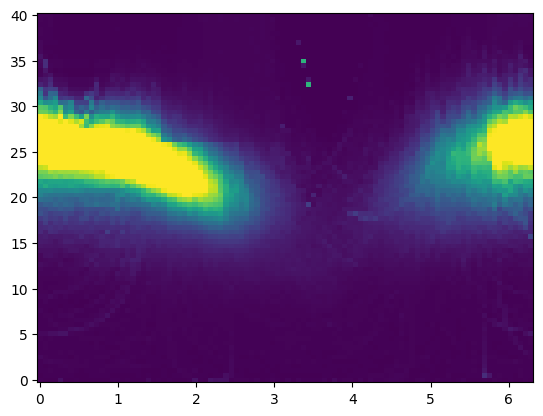

In [33]:
draw_weighted_flux(dt, atype='diff', jtype='energy')

In [11]:
import matplotlib.pyplot as plt
plt.plot(mlatgridN, )

array([[0.56749011, 0.65595644, 0.74495981, ..., 0.40070383, 0.48611013,
        0.56893329],
       [0.02983261, 0.0282435 , 0.02797234, ..., 0.04236324, 0.03784   ,
        0.03088242],
       [0.02519462, 0.02309735, 0.02253324, ..., 0.06082743, 0.03413993,
        0.03014013],
       ...,
       [0.03961632, 0.04101112, 0.02720665, ..., 0.02366766, 0.02191044,
        0.02953484],
       [0.02372586, 0.01975155, 0.01968836, ..., 0.0261441 , 0.02337093,
        0.01882758],
       [0.02527614, 0.01539986, 0.01693261, ..., 0.01474044, 0.02339354,
        0.01617278]])

In [31]:
fluxgridN.max()

3.177642902235051